In [128]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Introduction

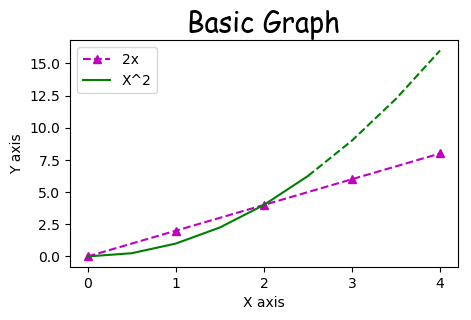

In [35]:
x=[0,1,2,3,4]
y=[0,2,4,6,8]

#Resize your graph
plt.figure(figsize=(5,3),dpi=100)

#Line 1

#Keyword argument notation
#plt.plot(x,y,label='2x',color='red',linewidth='2',marker='.',linestyle='--',markersize='10',markeredgecolor='blue')

#Shorthand notation
#fmt = '[color][marker][line]'
plt.plot(x,y,'m^--',label='2x')

## Line 2

#Select interval we want to plot points at
x2=np.arange(0,4.5,0.5)

#Plot part of the graph as line
plt.plot(x2[:6],x2[:6]**2,'g',label='X^2')

#Plot remainder of graph
plt.plot(x2[5:],x2[5:]**2,'g--')

#Add a title (specify font parameters with fontdict)
plt.title('Basic Graph', fontdict={'fontname':'Comic Sans MS', 'fontsize':20})

#X and Y labels
plt.xlabel('X axis')
plt.ylabel('Y axis')

#X and Y axis tickmarks (scale of our graph)
plt.xticks([0,1,2,3,4])
#plt.yticks([0,2,4,6,8])

#Add a legend
plt.legend()

#Save graph (dpi is set to 300 when saving so graph will have higher resolution in saved file)
plt.savefig('mygraph.png',dpi=300)
 
#Show plot
plt.show()

### Bar Plot

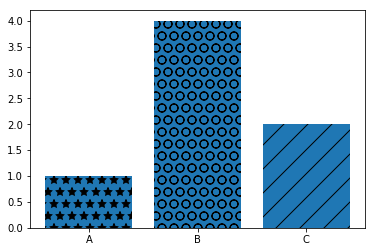

<Figure size 432x288 with 0 Axes>

In [39]:
labels = ['A','B','C']
values = [1,4,2]

bars = plt.bar(labels, values)

patterns =['/','O','*']
for bar in bars:
    bar.set_hatch(patterns.pop())

#bars[0].set_hatch('/')
#bars[1].set_hatch('O')
#bars[2].set_hatch('*')

plt.figure(figsize=(6,4))

plt.show()

## Working with Real World Datasets

### Gas Prices Line Graph

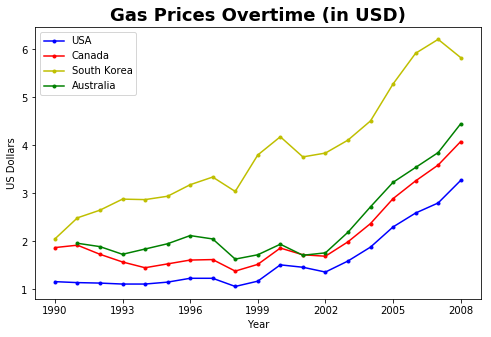

In [27]:
#Load Gas Prices' dataset
gas = pd.read_csv('gas_prices.csv')

plt.figure(figsize=(8,5))

plt.title('Gas Prices Overtime (in USD)',fontdict={'fontweight':'bold','fontsize':18})
                                                   
plt.plot(gas.Year,gas.USA,'b.-')
plt.plot(gas.Year,gas.Canada,'r.-')
plt.plot(gas.Year,gas['South Korea'],'y.-')
plt.plot(gas.Year,gas.Australia,'g.-')

#Another way to plot many values!
#for country in gas:
#    if country != 'Year':
#        plt.plot(gas.Year,gas[country],marker='.')

plt.xticks(gas.Year[::3])

plt.xlabel('Year')
plt.ylabel('US Dollars')

plt.legend()

plt.savefig('mygraph.png',dpi=300)

plt.show()

### Fifa(Internation Federation of Association Football) Dataset

In [29]:
fifa = pd.read_csv('fifa_data.csv')

fifa.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### Histogram

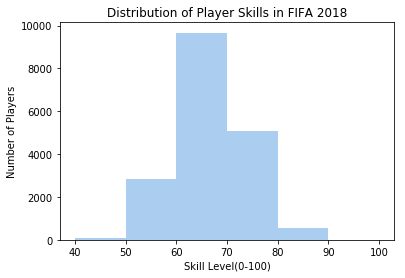

In [39]:
bins=[40,50,60,70,80,90,100]

plt.hist(fifa.Overall,bins=bins, color ='#abcdef')

plt.xticks(bins)

plt.title('Distribution of Player Skills in FIFA 2018')
plt.xlabel('Skill Level(0-100)')
plt.ylabel('Number of Players')

plt.show()

### Pie Charts

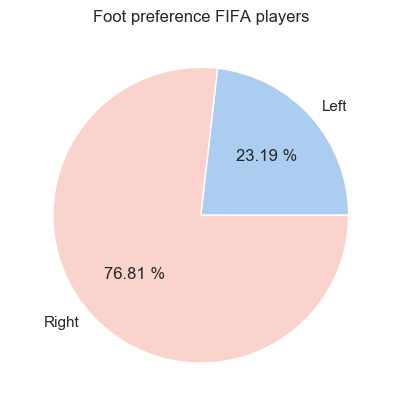

In [151]:
left = fifa.loc[fifa['Preferred Foot'] == 'Left'].count()[0]
right = fifa.loc[fifa['Preferred Foot'] == 'Right'].count()[0]

labels=['Left','Right']
colors=['#abcdef','#fad4cc']

plt.pie([left,right], labels=labels, colors=colors, autopct='%.2f %%')

plt.title('Foot preference FIFA players')

plt.show()

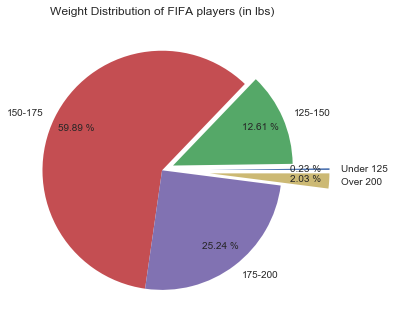

In [99]:
fifa.Weight= [float(x.strip('lbs')) if type(x) == str else x for x in fifa.Weight]

plt.style.use('seaborn')

#fifa.Weight/2.20266262 for kg conversion
light = fifa.loc[fifa.Weight< 125].count()[0]
light_medium=fifa.loc[(fifa.Weight>=125) & (fifa.Weight <150)].count()[0]
medium=fifa[(fifa.Weight >=150) & (fifa.Weight<175)].count()[0]
medium_heavy=fifa.loc[(fifa.Weight >=175) & (fifa.Weight<200)].count()[0]
heavy=fifa[(fifa.Weight >200)].count()[0]

weights = [light,light_medium,medium,medium_heavy,heavy]
labels = ['Under 125','125-150','150-175','175-200','Over 200']
explode=(.4,0.1,0,0,0.4)

plt.title('Weight Distribution of FIFA players (in lbs)')

plt.pie(weights,labels=labels, autopct='%.2f %%', pctdistance=0.8, explode=explode)

plt.show()

### Box&Whisker Plot

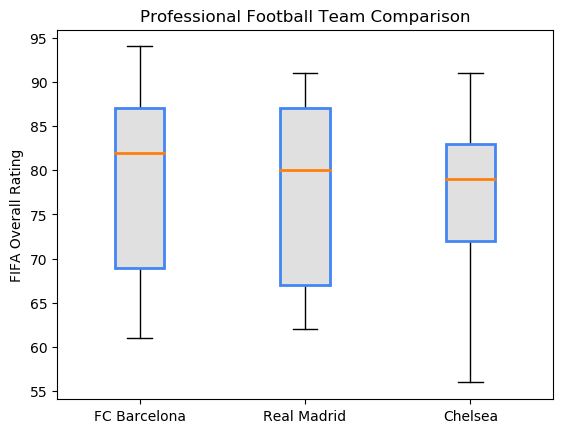

In [122]:
plt.style.use('default')

#You can bring up as much teams as you please
barcelona = fifa.loc[fifa.Club == 'FC Barcelona']['Overall']
madrid= fifa.loc[fifa.Club == 'Real Madrid']['Overall']
Chelsea= fifa.loc[fifa.Club == 'Chelsea']['Overall']

labels =['FC Barcelona','Real Madrid','Chelsea']

boxes = plt.boxplot([barcelona,madrid,Chelsea],labels=labels,patch_artist=True,medianprops={'linewidth':2})

for box in boxes['boxes']:
    #set edge color
    box.set(color='#4286f4',linewidth=2)
    #change fill color
    box.set(facecolor='#e0e0e0')

plt.title('Professional Football Team Comparison')
plt.ylabel('FIFA Overall Rating')

plt.show()

 ###                                   Affect of Age on the Perfomance of Players

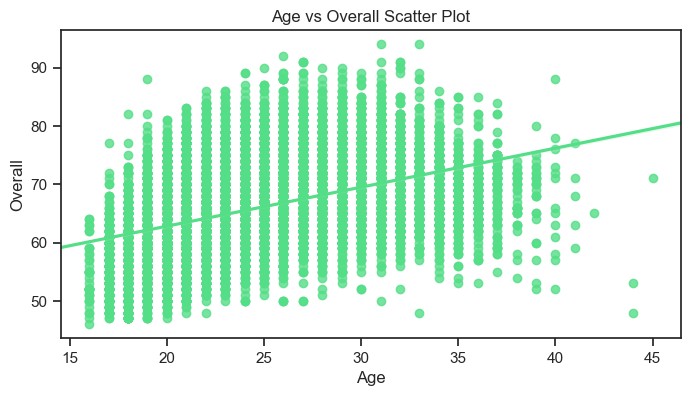

In [146]:
#scatter plot of Age vs Overall
plt.figure(1,figsize=(8,4))
sns.regplot(fifa['Age'],fifa['Overall'],color ='#54de87')
plt.title('Age vs Overall Scatter Plot')
plt.show()

### Affect of Age on the Potential of Players

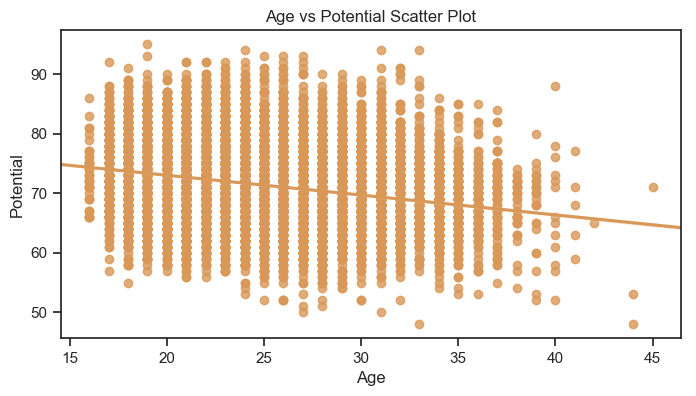

In [145]:
#scatter plot of Age vs Potential
plt.figure(1,figsize=(8,4))
sns.regplot(fifa['Age'],fifa['Potential'],color='#d99857')
plt.title('Age vs Potential Scatter Plot')
plt.show()

### Positions and the Number of Players 

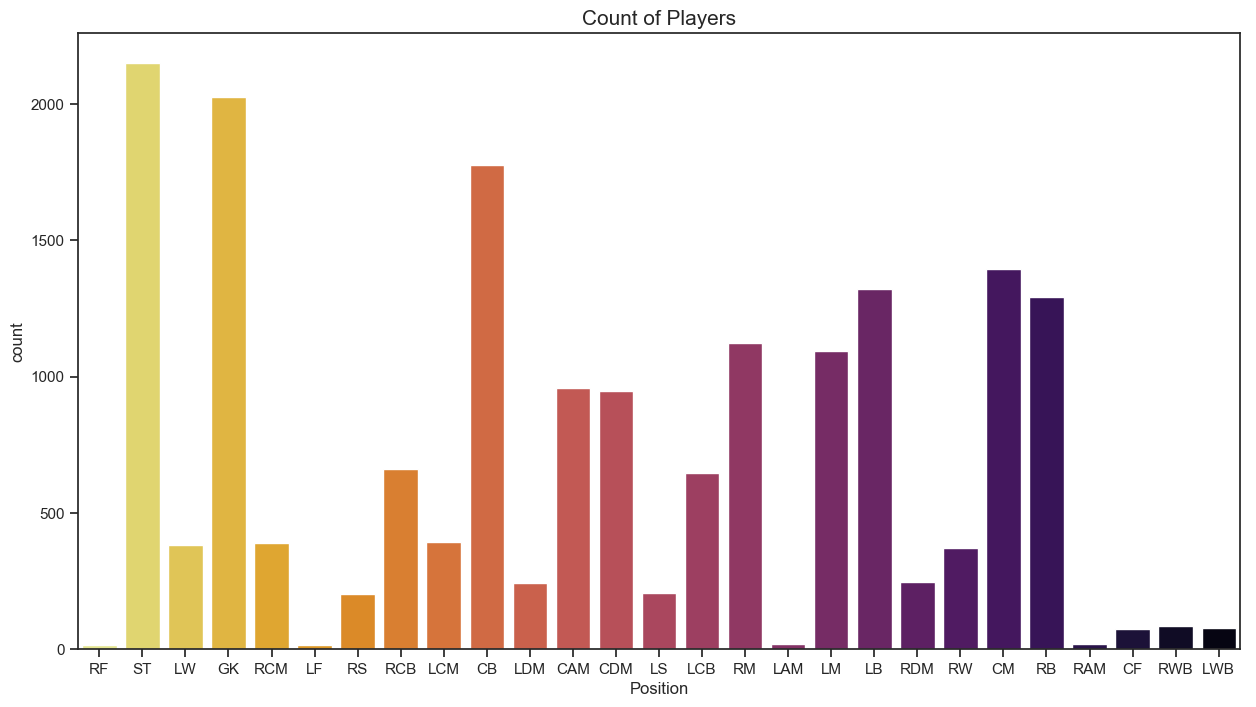

In [148]:
#count of players Position Wise
plt.figure(1,figsize=(15,8))
p = sns.countplot(x = 'Position', data = fifa,palette='inferno_r')
p.set_title(label='Count of Players', fontsize=15)
plt.show()
#As we can see from the graph players who play as a ST(Striker) are a majority

### Potential of Players From Top 10 Countries

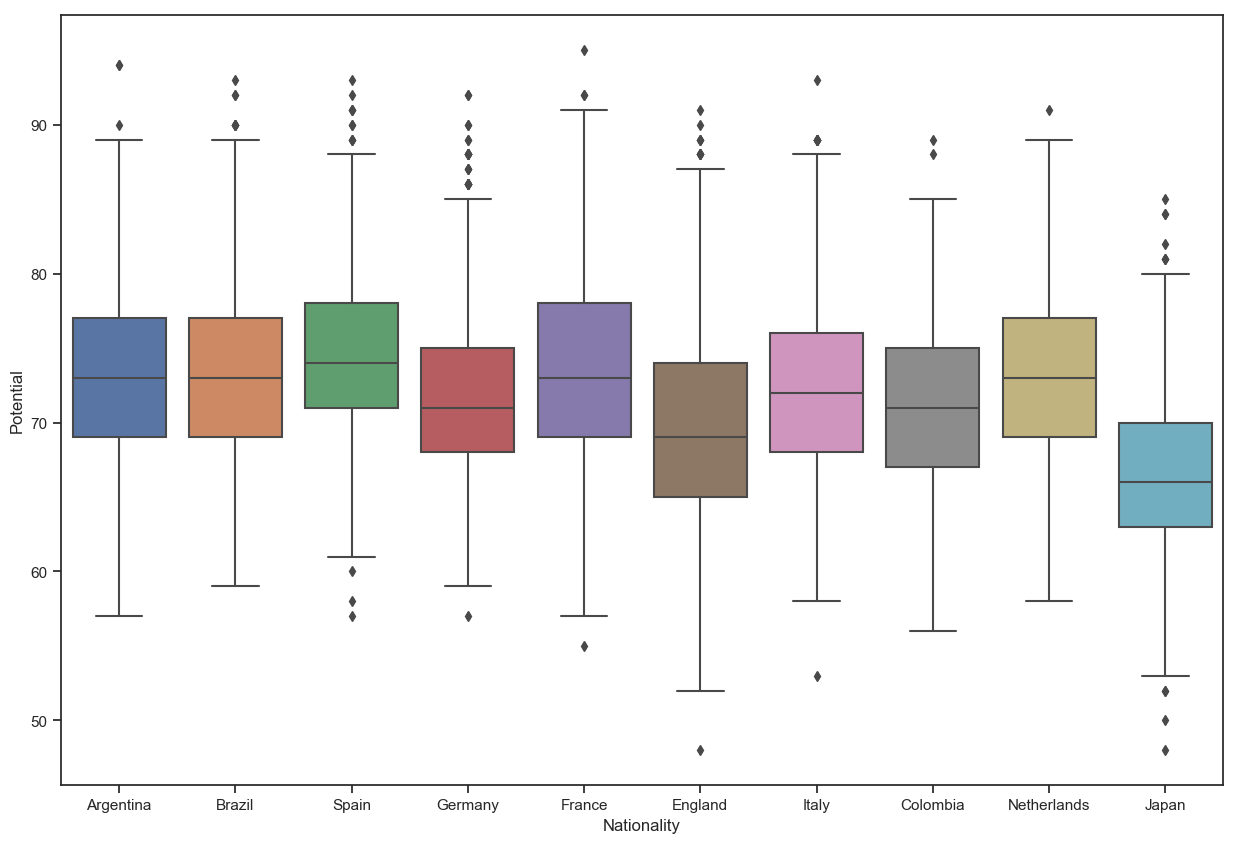

In [150]:
ten_countries = fifa['Nationality'].value_counts().head(10).index.values
ten_countries_data = fifa.loc[fifa['Nationality'].isin(ten_countries),:]
sns.set(style="ticks")
plt.figure(figsize=(15,10))
p=sns.boxplot(x='Nationality',y='Potential',data=ten_countries_data)

#### PREPARED BY: GURCAN KAYNAK